In [115]:
import pickle
import os
import numpy as np

path = "/home/user/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/"
name = "5_98900_108900_51P0.pkl"

with open(os.path.join(path, 'test_0906_3', name), 'rb') as f:
    new_data = pickle.load(f, encoding="latin1")
    
with open(os.path.join(path, 'test', name), 'rb') as f:
    origin_data = pickle.load(f, encoding="latin1")

In [116]:
print(new_data.keys())
print(new_data['others_track'].keys())

print(origin_data.keys())
print(origin_data['agt_ids'])
print(origin_data['idx'])

dict_keys(['egos_track', 'others_track'])
dict_keys([51, 43, 52, 53, 54])
dict_keys(['shapes', 'idx', 'ref_paths', 'graph', 'has_preds', 'filename', 'gt_preds', 'agt_ids', 'ctrs', 'theta', 'gt_hist', 'rot', 'feats', 'orig'])
[51, 43, 52, 53, 54]
51


In [117]:
ego_id = origin_data['idx']
new_data['others_track'][ego_id]

[[1.7799999713897705, 4.46999979019165, 98900, 108900],
 [98900, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99000, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99100, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99200, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99300, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99400, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99500, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99600, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99700, 997.72998046875, 1004.22802734375, 0.0, 0.0, -1.6770000457763672],
 [99800,
  997.7269897460938,
  1004.2069702148438,
  -0.00299072265625,
  -0.02105712890625,
  -1.6770000457763672],
 [99900,
  997.7260131835938,
  1004.1939697265625,
  -0.0009765625,
  -0.01300048828125,
  -1.6770000457763672],
 [100000,
  997.724975585937

In [16]:
new_data['egos_track']

{109: [['231200', '241200'],
  [1013.1530151367188, 986.719970703125, 0.0],
  [1013.0027465820312, 986.6775512695312, 0.29020018549478754]]}

NameError: name 'data' is not defined

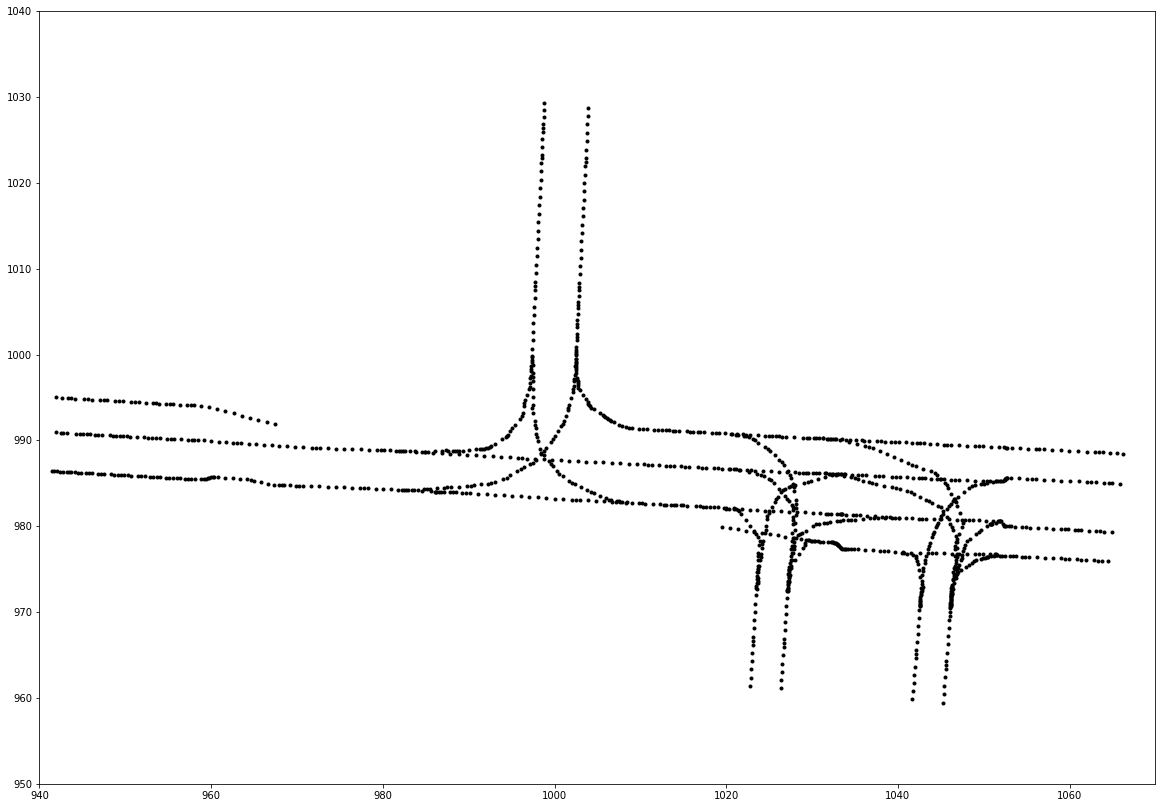

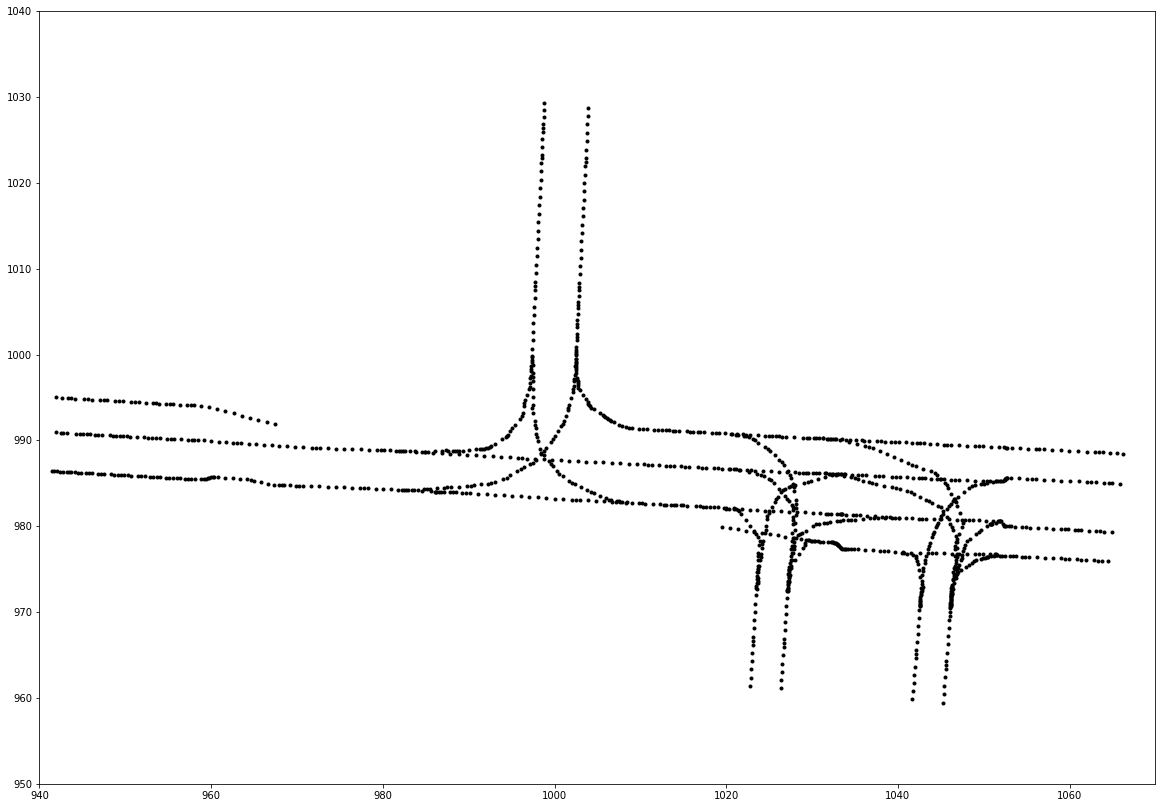

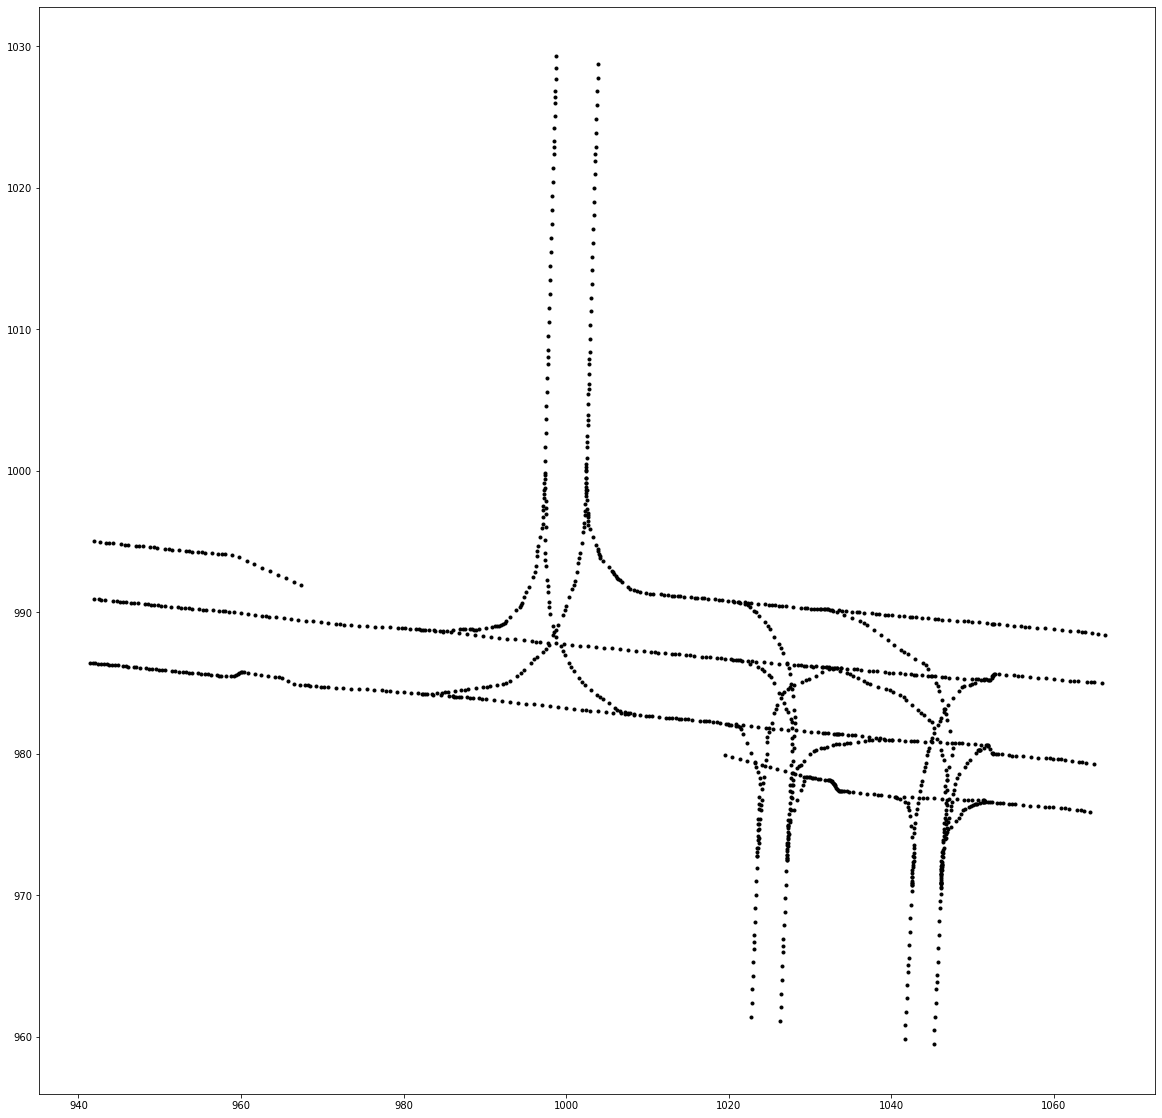

In [118]:
fig, ax = plt.subplots(1, 1, figsize=[20,20])
# ax.set_aspect('equal')

graph_ctrs = np.matmul(origin_data['graph']['ctrs'], origin_data['rot']) + origin_data['orig']
ax.plot(graph_ctrs[:, 0], graph_ctrs[:, 1], 'k.')
for a in data['egos_track'].keys():
    traj = np.asarray(data['egos_track'][a][1:])
    plt.plot(traj[:, 0], traj[:, 1], 'r*')

for a in data['others_track'].keys():
    traj = np.asarray(data['others_track'][a][1:])
    plt.plot(traj[:, 1], traj[:, 2], 'b*')
    
#     plt.plot(traj[:1, 0], traj[:1, 1], 'r*')
    

KeyError: 'prediction'

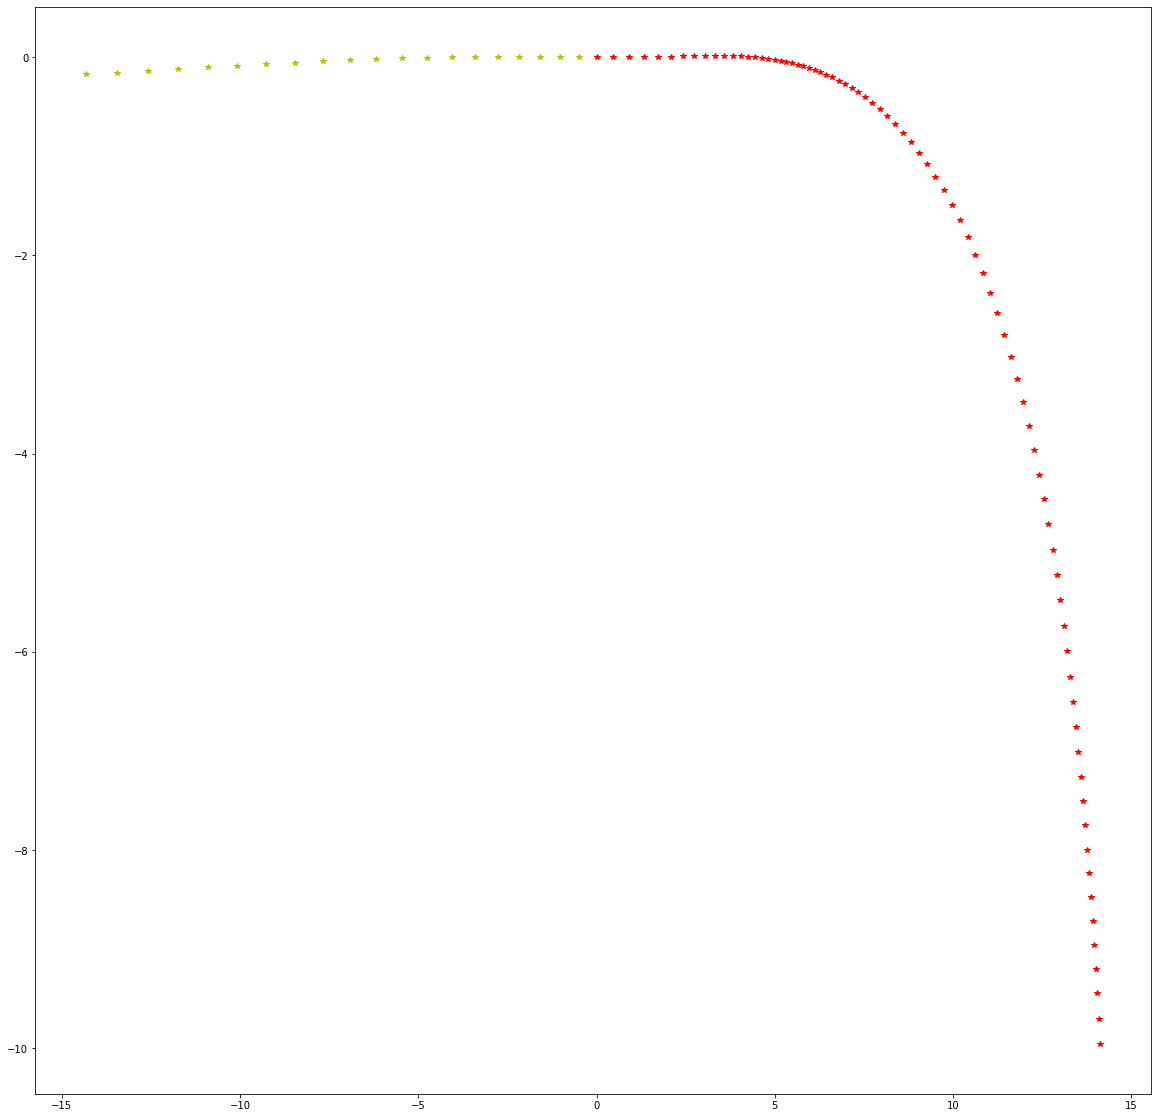

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[20,20])
pt = 50
# graph = data['graph']
# mp = graph['ctrs']

# X = []
# Y = []
# C = []

# # cl = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# for i in range(len(graph['suc'])):
#     u = graph['suc'][i]['u']
#     v = graph['suc'][i]['v']
# #     print('v size:', v.shape)
    
#     tmp = np.where(u == pt)
#     if tmp is not None and tmp[0] is not None and tmp[0].shape[0] > 0:
#         print(i, 'l:', len(tmp[0]))
        
#         for idx in tmp[0]:
# #             idx = tmp[0][0]

#             X.append(mp[v[idx], 0])
#             Y.append(mp[v[idx], 1])
#             C.append(i)

            
# # for side in ['left_pairs', 'right_pairs']:
# #     u = graph[side]['u']
# #     v = graph[side]['v']

# #     tmp = np.where(u == pt)
# #     if tmp and tmp[0] and tmp[0].shape[0] > 0:
# #         print(side, 'l:', len(tmp[0]))
        
# #         for idx in tmp[0]:
# #             X.append(mp[v[idx], 0])
# #             Y.append(mp[v[idx], 1])
# #             C.append(1)
    
    
# plt.plot(mp[:, 0], mp[:, 1], 'k.')
# plt.plot(X, Y)

# plt.scatter(X, Y, s = 200, c = C)
# print(X, Y)

# # for a in range(data['feats'].shape[0]):
# #     traj = data['feats'][a]
# #     plt.plot(traj[:, 0], traj[:, 1], '*')

# #     for L in data['ref_paths'][a]:
# #         if len(L)==0:
# #             continue
# #         lane = np.concatenate(L) - data['orig']
# #         plt.plot(lane[:, 0], lane[:, 1])
        

for a in range(data['feats'].shape[0]):
    traj = np.matmul(data['rot'], (data['gt_preds'][a] - data['orig']).T).T
    plt.plot(traj[:, 0], traj[:, 1], 'r*')
#     plt.plot(traj[:1, 0], traj[:1, 1], 'r*')
    
    hist = np.matmul(data['rot'], (data['gt_hist'][a][:, :2] - data['orig']).T).T
    plt.plot(hist[:, 0], hist[:, 1], 'y*')
    
    prediction = np.matmul(data['rot'], (data['prediction'][a][0] - data['orig']).T).T
    plt.plot(prediction[:, 0], prediction[:, 1], 'b*')
    
    for L in data['ref_paths'][a]:
        lane = np.matmul(data['rot'], (L - data['orig']).T).T
#         plt.plot(lane[:, 0], lane[:, 1], 'r')      

    # plt.savefig('/home/user/Logs/0607/地图6步未插值' + str(pt) + '.png')


In [25]:
print (graph['suc'][0])
print (graph['feats'].shape)

{'u': array([   0,    1,    2, ..., 1328, 1329, 1330]), 'v': array([   1,    2,    3, ..., 1329, 1330, 1331])}
(1332, 2)


In [6]:
def dfs(cur_graph_id, Lanes, lane, cur_len, S_pred):
    suc_indices = (graph['suc'][0]['u']==cur_graph_id).nonzero()
    if cur_len > S_pred or suc_indices[0].shape[0]==0:
        Lanes.append(lane[:])
        print(cur_len, S_pred)
        print(Lanes[-1])
        return 
    
    for suc_id in suc_indices:
#         print(graph['suc'][0]['v'][suc_id[0]])
#         print(suc_id)
        lane.append(graph['suc'][0]['u'][suc_id[0]])
        
        s_diff = graph['ctrs'][graph['suc'][0]['v'][suc_id[0]]] - graph['ctrs'][graph['suc'][0]['u'][suc_id[0]]]
        s = np.sqrt(np.sum(s_diff ** 2))
#         print(s.numpy())
        dfs(graph['suc'][0]['v'][suc_id[0]], Lanes, lane, cur_len + s, S_pred)
        lane.pop()

ego_graph_id = 300
Lanes = []
dfs(ego_graph_id, Lanes, [], 0, S_pred=100)
frenet_lane = graph['ctrs'][Lanes[0]]

NameError: name 'graph' is not defined

In [7]:
graph['ctrs'].shape

NameError: name 'graph' is not defined

NameError: name 'graph' is not defined

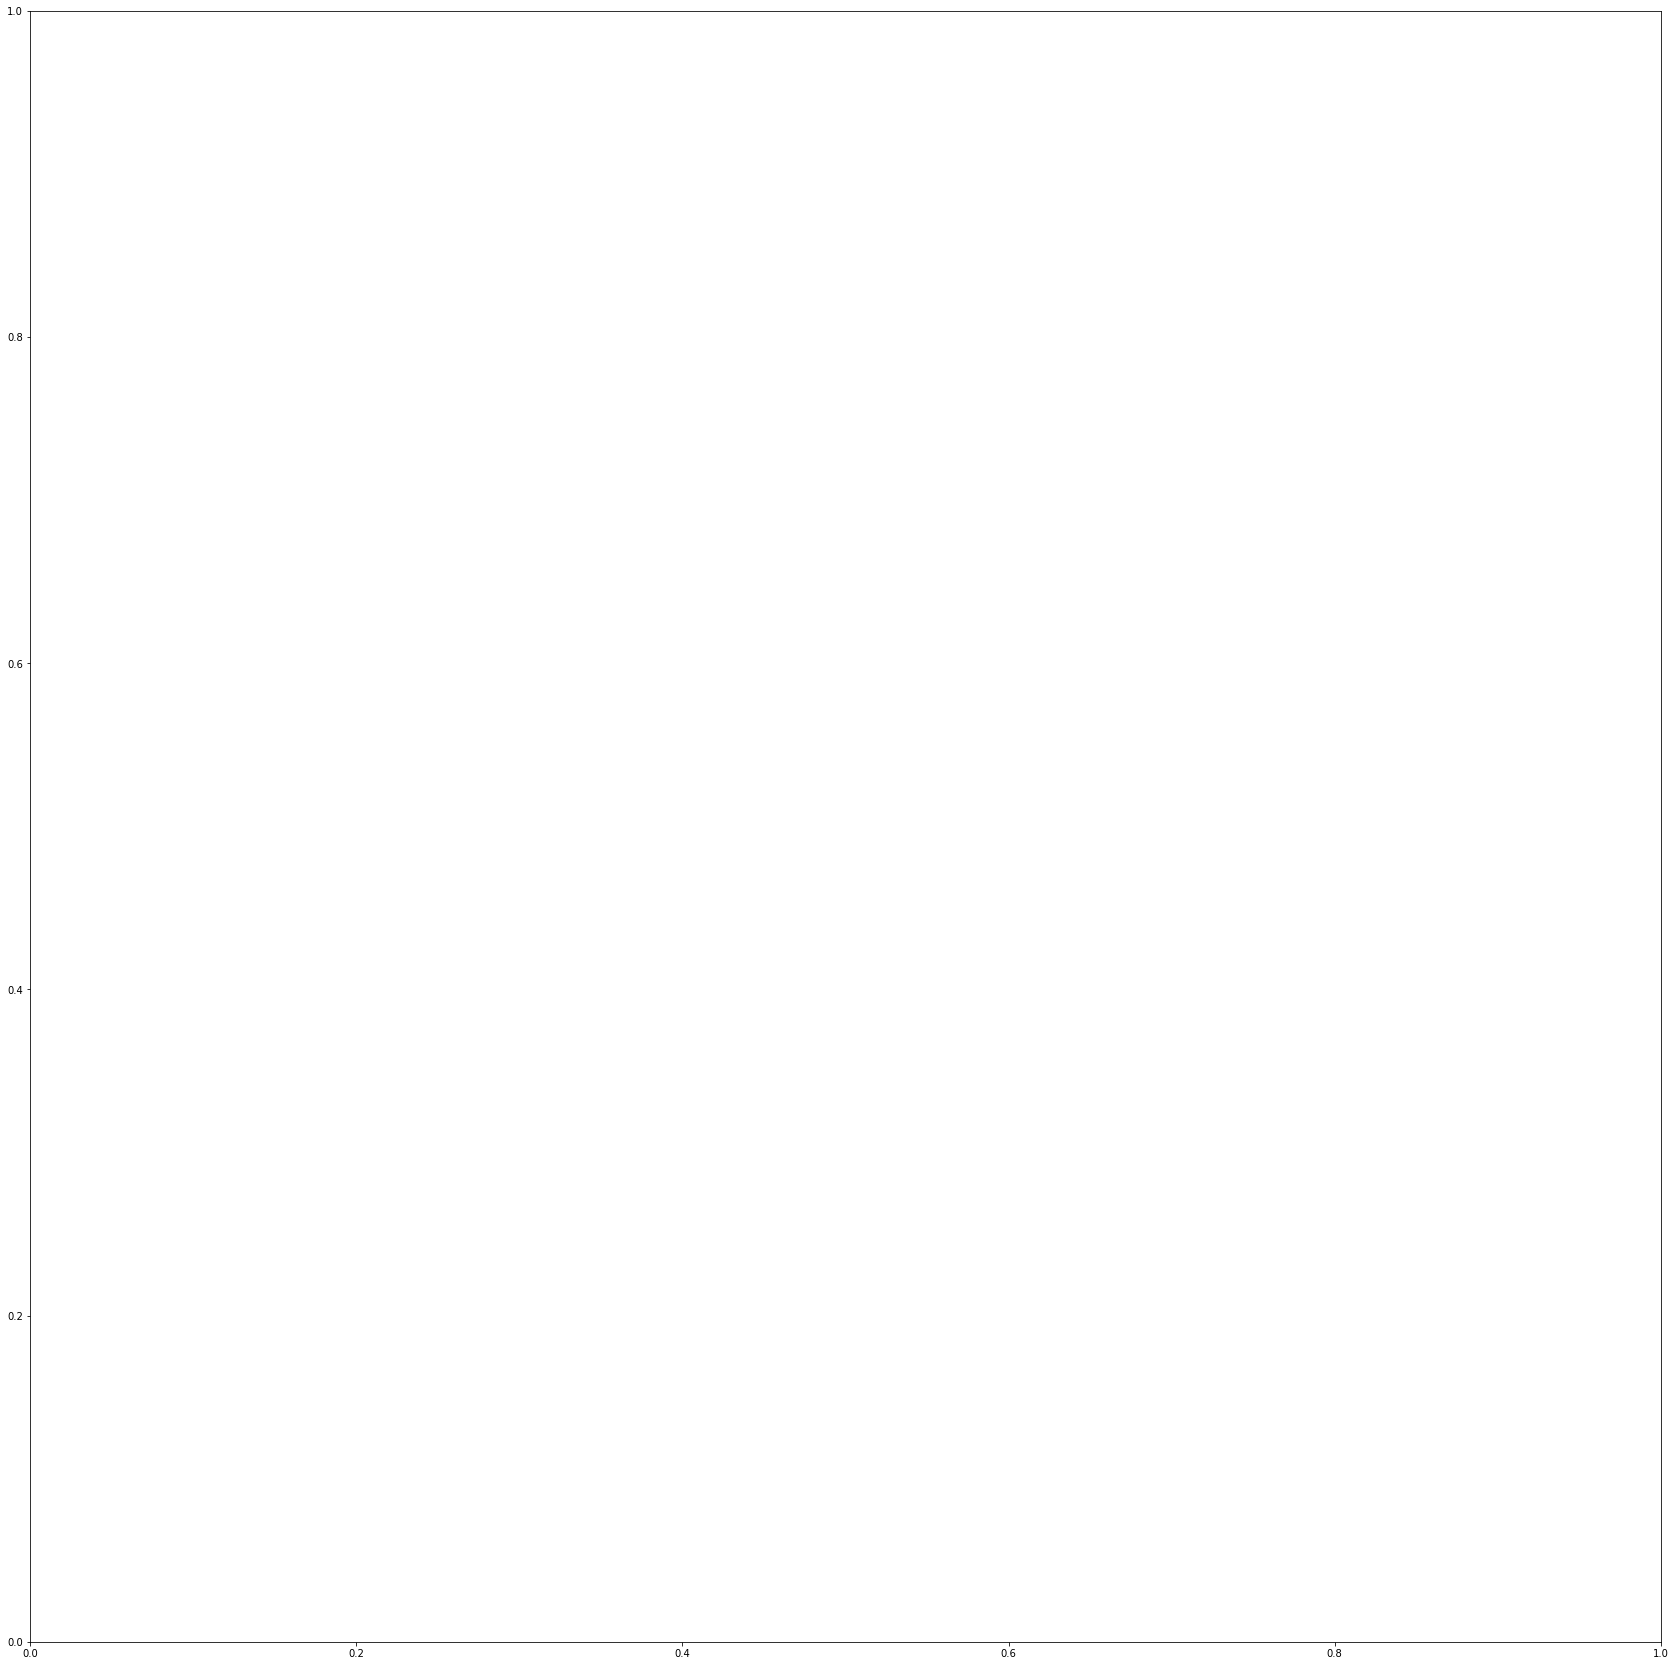

In [8]:
idx = 1

fig, ax = plt.subplots(1,1, figsize=(30,30))
ax.set_aspect('equal', adjustable='box')
#     plt.gca().invert_xaxis()
#     plt.gca().invert_yaxis()     
# for a in range(data['gt_preds'][0].shape[0]):
#     mask = has_preds[a]
#     gt_pred = gt_preds[a][mask]

#     hist = data['feats'][idx][a]
# #     plt.plot(hist[:, 0], hist[:, 1], 'y.')
# #     traj_plot(gt_pred,  rot, orig, ax, 'r.')

#     pred_traj = results[idx][a, k, :, :]
# #     traj_plot(pred_traj, rot, orig, ax, 'b.')


ctrs = graph['ctrs']
ax.plot(ctrs[:, 0], ctrs[:, 1], 'k.')

ego_graph_id = 100
Lanes = []

ax.plot([graph['ctrs'][ego_graph_id][0]], [graph['ctrs'][ego_graph_id][1]], 'b*')
dfs(ego_graph_id, Lanes, [], 0, S_pred=100)
for Lane in Lanes:
    frenet_lane = graph['ctrs'][Lane]
    ax.plot(frenet_lane[:, 0], frenet_lane[:, 1], 'g')


plt.show()

In [29]:
n_agts = data['gt_preds'][0].shape[0]
dis = np.zeros([n_agts, n_agts])
for a in range(n_agts):
    for b in range(n_agts):
        if a == b:
            dis[a, b] = float('inf')
            continue
        sss = torch.sum((data['gt_preds'][0][a] - data['gt_preds'][0][b]) ** 2, 1)
        dis[a, b] = torch.min(sss).item()
        
print(dis)
np.argmin(dis, 0)


NameError: name 'torch' is not defined

In [ ]:
torch.argmin(sss)
dis

In [30]:
import torch
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm
import sys
from importlib import import_module
from utils import Logger, load_pretrain, gpu, to_long,  Optimizer, StepLR

from data import InteDataset

root_path = '/home/user/Projects/LaneGCN_modified'
sys.path.insert(0, root_path)

model = import_module("lanegcn")
config, _, collate_fn, net, loss, post_process, opt = model.get_model(80)



ckpt_path = "/home/user/Datasets/interpolated/preprocess_results_10s_interp10scale8/results/30.000.ckpt"
# ckpt_path = "/media/drl/datas/zyk/LaneGCN/results/lanegcn/17.000.ckpt"

if not os.path.isabs(ckpt_path):
    ckpt_path = os.path.join(config["save_dir"], ckpt_path)
ckpt = torch.load(ckpt_path, map_location=lambda storage, loc: storage)
load_pretrain(net, ckpt["state_dict"])
net.eval()





dataset = InteDataset('/home/user/Datasets/interpolated/preprocess_results_10s_interp10scale8/tmp/')
data_loader = DataLoader(
    dataset,
    batch_size=config["val_batch_size"],
    num_workers=config["val_workers"],
    collate_fn=collate_fn,
    shuffle=True,
    pin_memory=True,
)

# begin inference
preds = {}
gts = {}
cities = {}

data_list = []
for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    with torch.no_grad():
        output = net(data)
        results = [x.detach().cpu().numpy() for x in output["reg"]]


1it [00:02,  2.30s/it]


In [ ]:
print(data['graph'][0].keys())
print(data['graph'][0]['feats'].shape)
print(data['graph'][0]['left_pairs'].shape)

In [ ]:
from lanegcn import graph_gather, actor_gather

actors, actor_idcs = actor_gather(gpu(data["feats"]))
actor_ctrs = gpu(data["ctrs"])
actors = net.actor_net(actors)

# construct map features
graph = graph_gather(to_long(gpu(data["graph"])))
nodes, node_idcs, node_ctrs = net.map_net(graph)

# actor-map fusion cycle 
nodes = net.a2m(nodes, graph, actors, actor_idcs, actor_ctrs)
nodes = net.m2m(nodes, graph)
actors = net.m2a(actors, actor_idcs, actor_ctrs, nodes, node_idcs, node_ctrs)
actors = net.a2a(actors, actor_idcs, actor_ctrs)

In [ ]:
print('len', len(node_ctrs))
print('node_ctrs[0]', node_ctrs[0].cpu().numpy().shape)
print(graph['pre'][0]['u'].cpu().numpy())

all_ctrs = torch.cat(node_ctrs, 0).cpu().numpy()
print(all_ctrs.shape)
idx = np.where(u == pt)
print(graph['left'])

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[20,20])
pt = 270
mp = node_ctrs[0].cpu().numpy()

X = []
Y = []
C = []

cl = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i in range(len(graph['suc'])):
    u = graph['suc'][i]['u'].cpu().numpy()
    v = graph['suc'][i]['v'].cpu().numpy()
#     print('v size:', v.shape)
    
    tmp = np.where(u == pt)
    if tmp is not None and tmp[0] is not None and tmp[0].shape[0] > 0:
#         print(i, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
#             idx = tmp[0][0]

            X.append(all_ctrs[v[idx], 0])
            Y.append(all_ctrs[v[idx], 1])
            C.append(cl[i])

            
for side in ['left', 'right']:
    u = graph[side]['u'].cpu().numpy()
    v = graph[side]['v'].cpu().numpy()

    tmp = np.where(u == pt)
    if tmp and tmp[0] and tmp[0].shape[0] > 0:
        print(side, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
            X.append(all_ctrs[v[idx], 0])
            Y.append(all_ctrs[v[idx], 1])
            C.append(cl[1])
    
    
plt.plot(mp[:, 0], mp[:, 1], 'r.')
# plt.plot(X, Y)

plt.scatter(X, Y, s = 100, c = C)
print(X, Y)

# plt.savefig('/home/user/Logs/0607/地图6步未插值' + str(pt) + '.png')


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[20,20])

u = graph['pre'][i]['u'].cpu().numpy()
print('u size:', u.shape)
v = graph['pre'][i]['v'].cpu().numpy()

In [134]:
import pickle
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes
from matplotlib.collections import PatchCollection
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as colors
from shapely.geometry import Polygon


def rect_plot(pos, rot, orig, w, l, ax, c):
    rot = rot.numpy()
    orig = orig.numpy()    

    ax.plot(centerline[:, 0], centerline[:, 1], c)
    return centerline

def polygon_xy_from_motionstate(ms, width, length):
    lowleft = (ms[0] - length / 2., ms[1] - width / 2.)
    lowright = (ms[0] + length / 2., ms[1] - width / 2.)
    upright = (ms[0] + length / 2., ms[1] + width / 2.)
    upleft = (ms[0] - length / 2., ms[1] + width / 2.)
    return rotate_around_center(np.array([lowleft, lowright, upright, upleft]), np.array([ms[0], ms[1]]), yaw=ms[2])

def rotate_around_center(pts, center, yaw):
    return np.dot(pts - center, np.array([[np.cos(yaw), np.sin(yaw)], [-np.sin(yaw), np.cos(yaw)]])) + center


path = "/home/user/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/"
new_test = 'test_0906_4'
filenames = os.listdir(os.path.join(path, new_test))

# name = filenames[150]
collision_trajs_count = 0
all_trajs_count = 0
for name in filenames:
    
    with open(os.path.join(path, new_test, name), 'rb') as f:
        new_data = pickle.load(f, encoding="latin1")

    with open(os.path.join(path, 'test', name), 'rb') as f:
        origin_data = pickle.load(f, encoding="latin1")

    N = len(new_data['others_track'].keys())
    collision = np.zeros(N)
    all_trajs_count += N
    for time_stamp in range(100):
        polygon_coll = []
        for a in new_data['others_track'].keys():
            tmp = np.zeros([3])
            tmp[0] = new_data['others_track'][a][1:][time_stamp][1]
            tmp[1] = new_data['others_track'][a][1:][time_stamp][2]
            tmp[2] = new_data['others_track'][a][1:][time_stamp][5]

            width = new_data['others_track'][a][0][0]
            length = new_data['others_track'][a][0][1]
            ms = tmp
            rect = matplotlib.patches.Polygon(polygon_xy_from_motionstate(ms, width, length), closed=True, zorder=20)
            polygon_coll.append(Polygon(rect.get_verts()))

        for i in range(len(polygon_coll)):
            p1 = polygon_coll[i]
            for j in range(i+1, len(polygon_coll)):
                p2 = polygon_coll[j]

                if(p1.intersects(p2)):
                    collision[i] = 1
                    collision[j] = 1

    collision_trajs_count += np.sum(collision)
    print("%d of %d collision detected!" %(collision_trajs_count, all_trajs_count))

0 of 4 collision detected!
0 of 10 collision detected!
0 of 17 collision detected!
0 of 22 collision detected!
2 of 29 collision detected!
2 of 35 collision detected!
7 of 43 collision detected!
7 of 49 collision detected!
9 of 55 collision detected!
13 of 62 collision detected!
16 of 71 collision detected!
18 of 77 collision detected!
20 of 83 collision detected!
20 of 87 collision detected!


KeyboardInterrupt: 

In [113]:
collision_trajs_count / all_trajs_count

0.3197613197613198

In [136]:
path = "/home/user/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/"
new_test = 'test_0906_4'
filenames = os.listdir(os.path.join(path, new_test))
name = "5_98900_108900_51P0.pkl"
# name = "3_284000_294000_80P0.pkl"

with open(os.path.join(path, new_test, name), 'rb') as f:
    new_data = pickle.load(f, encoding="latin1")

with open(os.path.join(path, 'test', name), 'rb') as f:
    origin_data = pickle.load(f, encoding="latin1")


others_ids = new_data['others_track'].keys()
def create_animation():
    plt.ioff()
    fig, ax = plt.subplots(1,1, figsize=(20, 20))
    ax.set_aspect('equal', adjustable='box')

#   plt.gca().invert_xaxis()
#   plt.gca().invert_yaxis() 
    
    plt.ion()
    orig = origin_data['orig']
    rot = origin_data['rot']
    ctrs = origin_data['graph']['ctrs']

    nctrs = np.matmul(ctrs, rot) + orig
    ax.plot(nctrs[:, 0], nctrs[:, 1], 'k.')
    
    for ego in new_data['egos_track'].keys():
        ego_track = np.array(new_data['egos_track'][ego][1:])
        ax.plot(ego_track[:,0], ego_track[:,1], 'r.')

    for a in new_data['others_track'].keys():
        traj = np.array(new_data['others_track'][a][1:])
        plt.plot(traj[:,1], traj[:,2], 'b.')
        

    def animate_func(time_stamp):
        ax.patches = []
        polygon_show = []
        polygon_coll = []
        for a in new_data['others_track'].keys():
            tmp = np.zeros([3])
            tmp[0] = new_data['others_track'][a][1:][time_stamp][1]
            tmp[1] = new_data['others_track'][a][1:][time_stamp][2]
            tmp[2] = new_data['others_track'][a][1:][time_stamp][5]

            width = new_data['others_track'][a][0][0]
            length = new_data['others_track'][a][0][1]
            ms = tmp
            rect = matplotlib.patches.Polygon(polygon_xy_from_motionstate(ms, width, length), closed=True, zorder=20)
            polygon_show.append(rect)
            polygon_coll.append(Polygon(rect.get_verts()))

        for i in range(len(polygon_coll)):
            p1 = polygon_coll[i]
            for j in range(i+1, len(polygon_coll)):
                p2 = polygon_coll[j]

                if(p1.intersects(p2)):
                    polygon_show[i].set_color([1, 0, 0])
                    polygon_show[j].set_color([1, 0, 0])

            ax.add_patch(polygon_show[i])


    anim = animation.FuncAnimation(fig, animate_func, frames=100, interval=100)
    plt.close(fig)
    
    return anim

anim = create_animation()
HTML(anim.to_html5_video())

In [130]:
ego_track = np.array(new_data['egos_track'][51][1:])
ego_track

array([[ 997.72998047, 1004.22802734,    0.        ],
       [ 997.29016113, 1002.03253174,    2.19502186],
       [ 997.07220459,  999.78643799,    2.48671077],
       [ 997.10314941,  997.70019531,    3.47588695],
       [ 997.25354004,  995.58563232,    4.01438781],
       [ 997.79071045,  993.64141846,    3.27888804],
       [ 998.33856201,  991.60839844,    3.86820795],
       [ 999.19940186,  989.52947998,    4.45236234],
       [1000.57794189,  987.89093018,    4.32956211],
       [1002.38531494,  986.47241211,    5.04439213],
       [1004.08685303,  985.32922363,    5.12100945],
       [1006.0803833 ,  984.5291748 ,    5.35137424],
       [1008.24462891,  983.47619629,    4.82821156],
       [1010.5423584 ,  982.85437012,    7.28889981],
       [1011.24847412,  982.56176758,    7.64340016]])